In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np


In [10]:
fname_prefix = 'm1_'

logs_train = {}
logs_test = {}
prefixes = [20, 50, 80, 100]
for i, prefix in enumerate(prefixes):
    with open(fname_prefix + str(prefix) + '_accuracy.pkl', 'rb') as fo:
        if prefix == 20:
            logs_train[prefix] = pickle.load(fo)
        else:
            logs_train[prefix] = logs_train[prefixes[i-1]] + pickle.load(fo)
    with open(fname_prefix + str(prefix) + '_test_accuracy.pkl', 'rb') as fo:
        if prefix == 20:
            logs_test[prefix] = pickle.load(fo)
        else:
            logs_test[prefix] = logs_test[prefixes[i-1]] + pickle.load(fo)
print('max:', max(logs_test[100]))

max: 0.3770211424194202


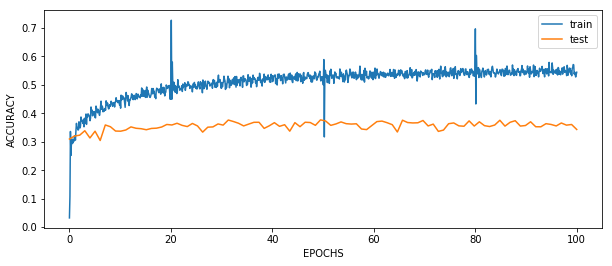

In [11]:
y1 = [x for i, x in enumerate(logs_train[100]) if (x != 0 and i != 0)]
x1 = np.linspace(start=0, stop=100, num=len(y1))
y2 = logs_test[100]
y2 = [x for i, x in enumerate(y2) if (x != 0 and i != 0)]
x2 = np.linspace(start=0, stop=100, num=len(y2))
fig, ax = plt.subplots()
ax.plot(x1, y1, label='train')
ax.plot(x2, y2, label='test')
fig.set_size_inches(10, 4)
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.legend()
plt.savefig('accuracy_m1.png', bbox_inches='tight')
